___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 6: Basics of data visualization

## Lab work 6



#### Мета: 

* навчитися візуалізовувати дані в Python

### Завдання:

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
np.random.seed(0)

df = pd.DataFrame(data={'a':np.random.randint(0, 100, 30),
                        'b':np.random.randint(0, 100, 30),
                        'c':np.random.randint(0, 100, 30)})
df.head()

,a,b,c
0,44,47,17
1,47,64,79
2,64,82,4
3,67,99,42
4,67,88,58


Створити візуалізацію, аналогічно рисунку 
 - перші 3 графіки візуалізувати, викорстовуючи значення із df
 - останній це пряма пропорційність

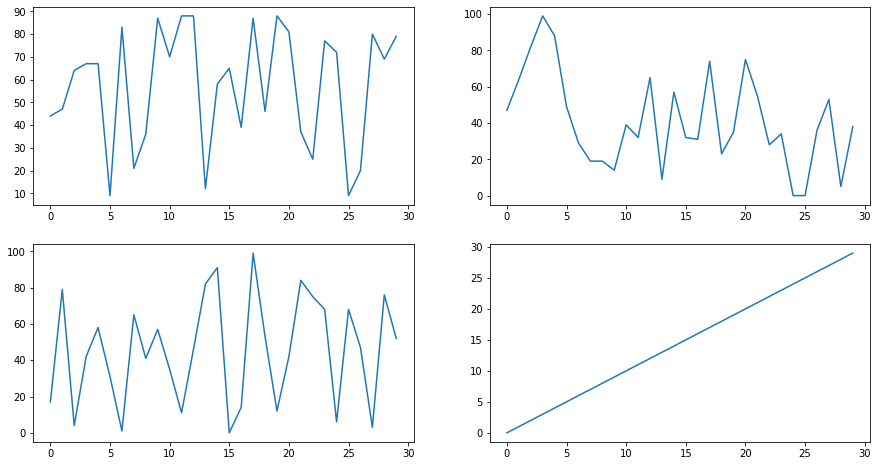

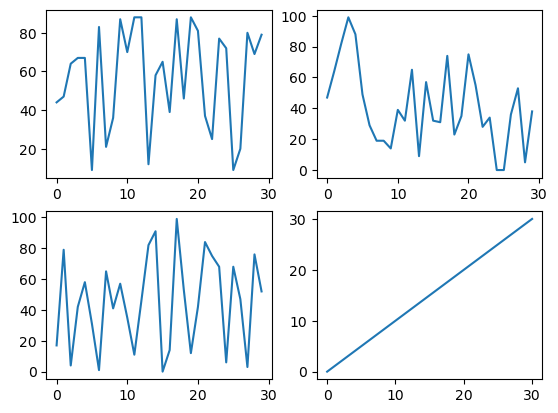

In [3]:
plt.subplot(2, 2, 1)

plt.plot(df['a'])

plt.subplot(2, 2, 2)
plt.plot(df['b'])

plt.subplot(2, 2, 3)
plt.plot(df['c'])

plt.subplot(2, 2, 4)
list1=list(np.arange(0,31,5))
plt.plot(list1,list1)

plt.show()

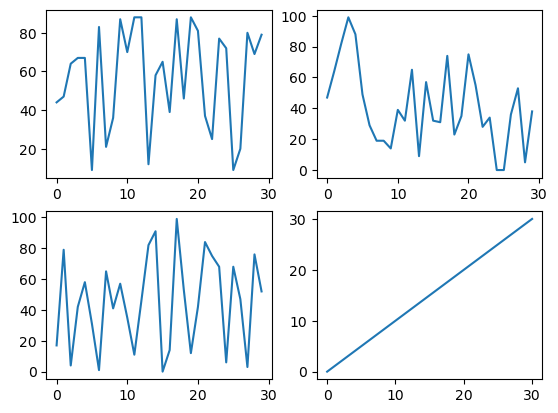

In [42]:
# Об'єктно-орієнтовний інтерфейс
fig, ax = plt.subplots(nrows=2, ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()
list1=list(np.arange(0,31,5))

ax1.plot(df['a'])
ax2.plot(df['b'])
ax3.plot(df['c'])
ax4.plot(list1,list1)

plt.show()

Створити візуалізацію, аналогічно рисунку 

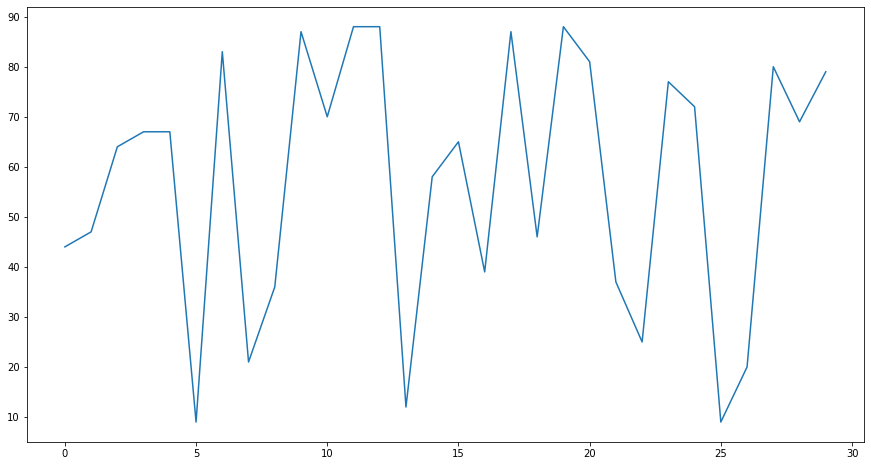

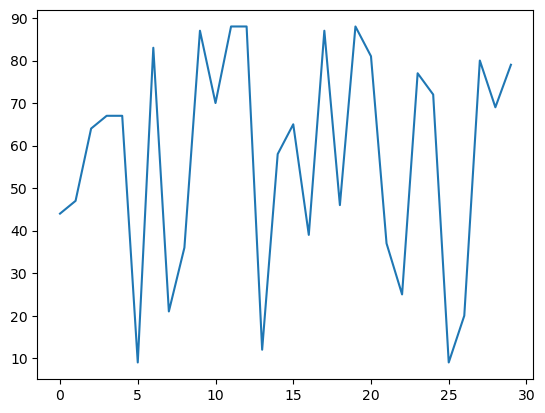

In [6]:
plt.plot(df['a'])
plt.show()

Створити візуалізацію, аналогічно рисунку 
- використовуйте колонки `a` та `b`

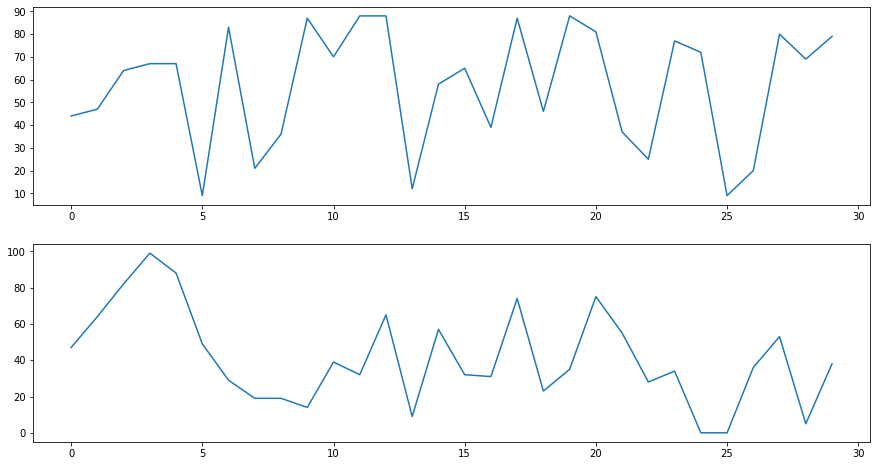

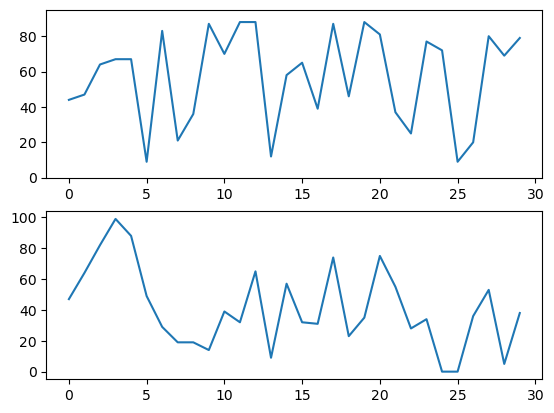

In [15]:
plt.subplot(2, 1, 1)
plt.ylim(0, 95)
plt.plot(df['a'])

plt.subplot(2, 1, 2)
plt.plot(df['b'])
plt.show()

Створити візуалізацію, аналогічно рисунку 
- використовуйте колонки `a` та `b`

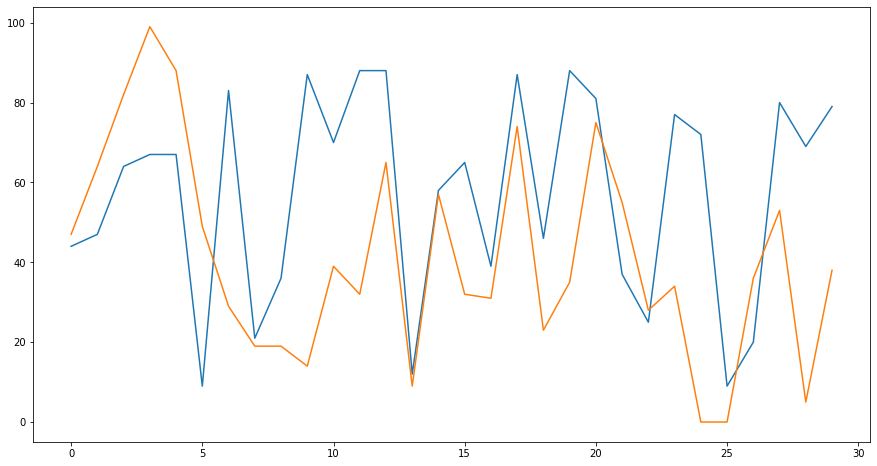

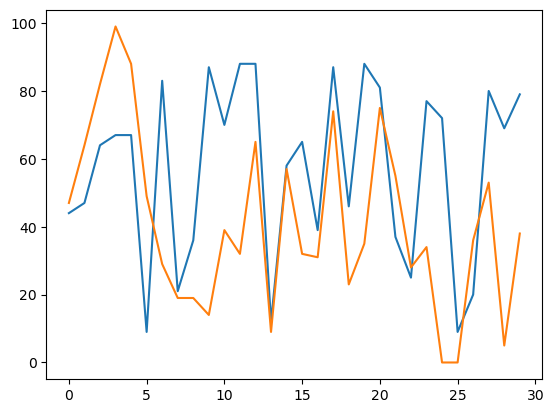

In [12]:
plt.plot(df['a'])
plt.plot(df['b'])
plt.show()

Створити візуалізацію, аналогічно рисунку 
- використовуйте колонки `a` та `b`
- задайте стиль 'darkgrid' за допомогою команди `sns.set_style`

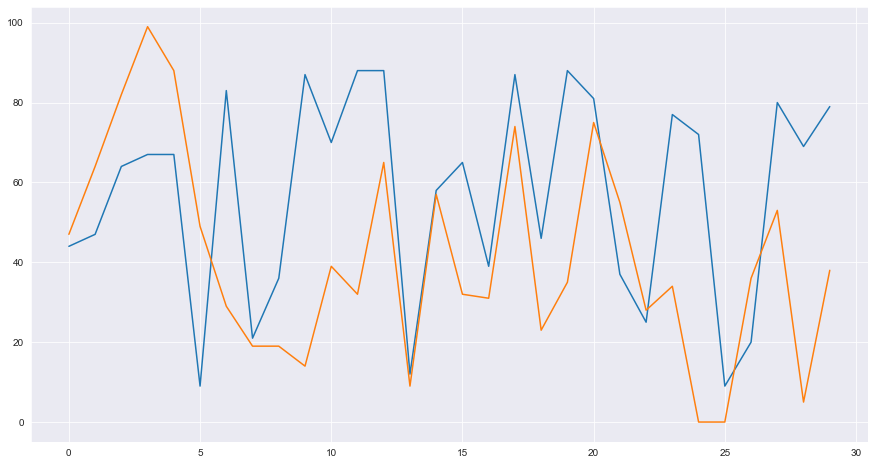

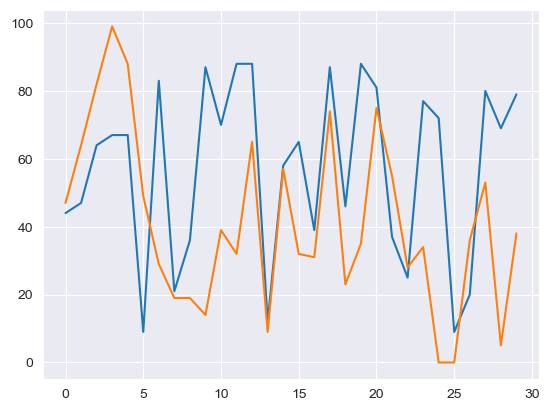

In [4]:
sns.set_style('darkgrid')
plt.plot(df['a'])
plt.plot(df['b'])

plt.show()

Створити візуалізацію, аналогічно рисунку 
- для колонки `a` використайте червоний колір та лінію формату `-.`

- для колонки `b` використайте помаранчевий колір та товщину `10`

- для колонки `c` використайте жовтий колір та товщину `1` і маркер `o`


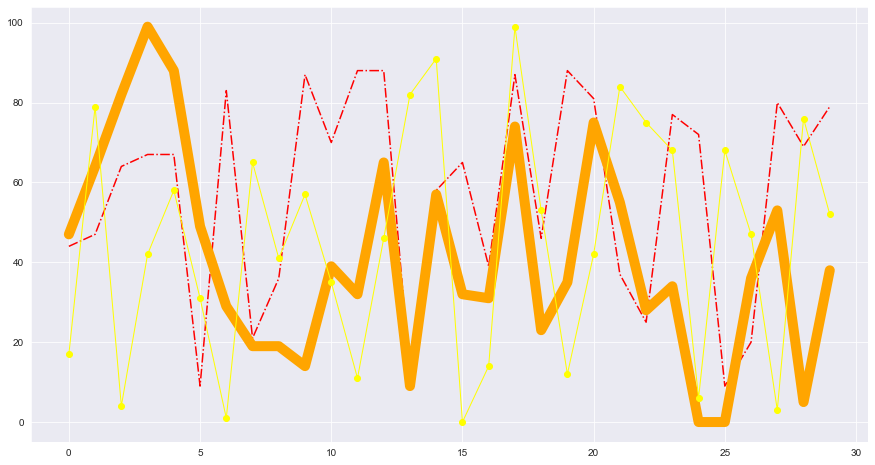

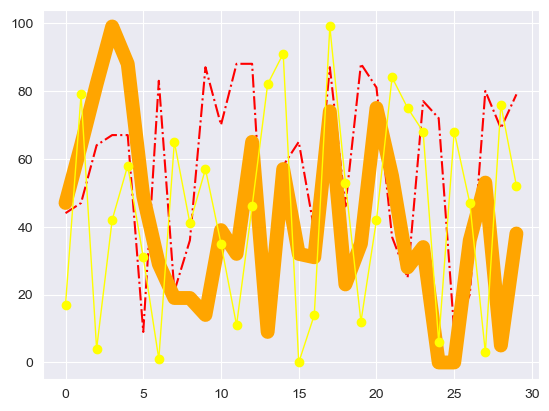

In [5]:
#sns.set_style('darkgrid')
plt.plot(df['a'] ,color = 'r', linestyle = '-.')
plt.plot(df['b'] ,color = 'orange', linewidth = '10')
plt.plot(df['c'] ,color = 'yellow', linewidth = '1', marker = 'o')

plt.show()

Створити візуалізацію, аналогічно рисунку 
- і не забудьте про легенду :)

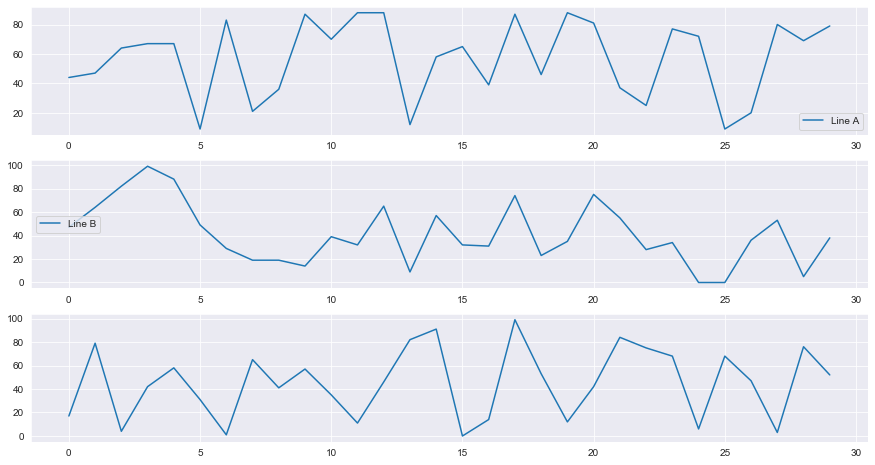

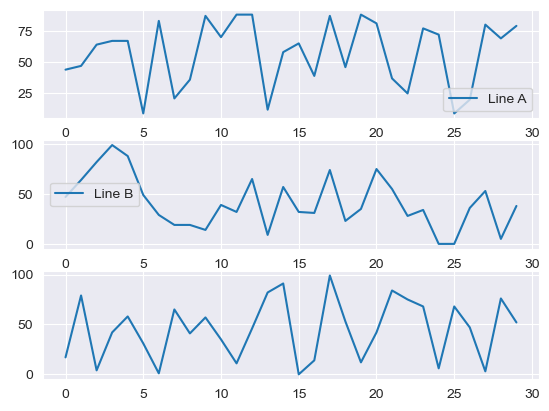

In [6]:
plt.subplot(3, 1, 1)

plt.plot(df['a'])
plt.legend(['Line A'], loc = 'lower right')

plt.subplot(3, 1, 2)
plt.plot(df['b'])
plt.legend(['Line B'], loc = 'center left')

plt.subplot(3, 1, 3)
plt.plot(df['c'])


plt.show()

Створити візуалізацію, аналогічно рисунку 
- використайте томатний колір та відстань між стовбцями 0.5

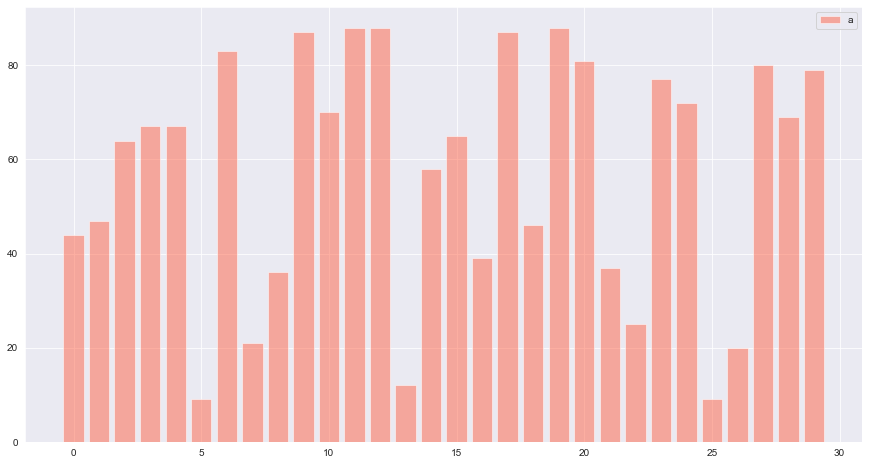

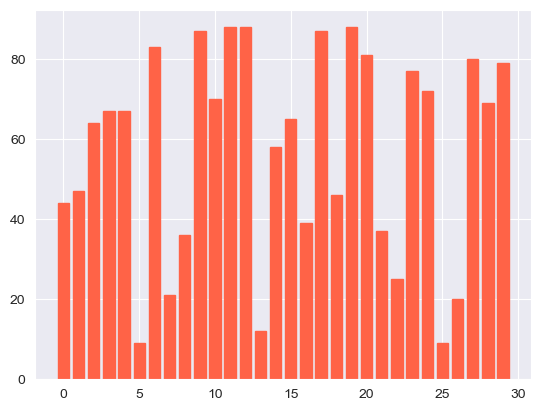

In [7]:
list2=list(np.arange(0,30,1))
plt.bar(list2,df['a'] , color ='tomato',edgecolor='tomato', width = 0.75)
plt.show()

Створити візуалізацію, аналогічно рисунку 
- добавте всі підписи та правильний маркер

No handles with labels found to put in legend.


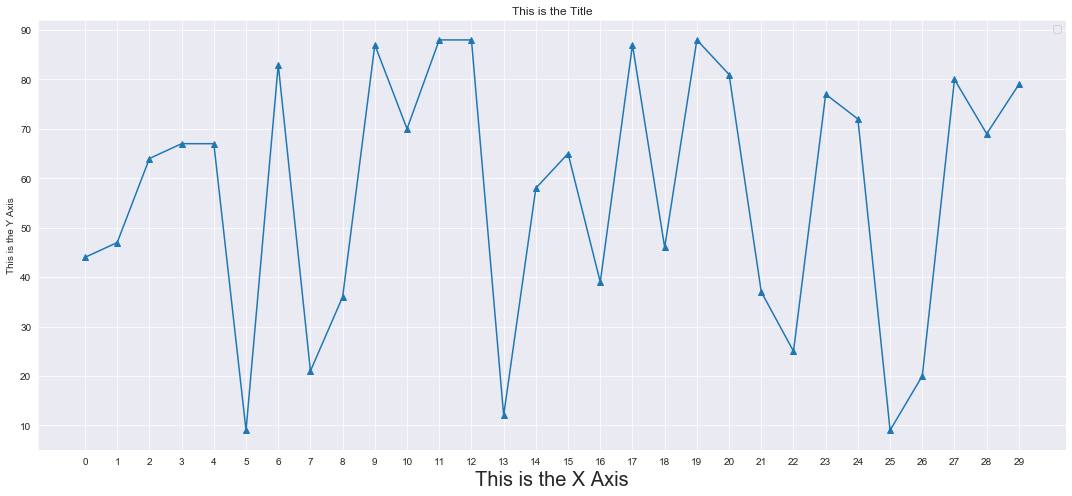

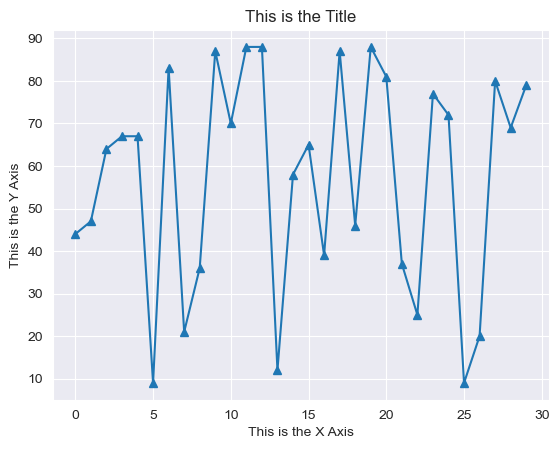

In [8]:
plt.plot(df['a'] ,marker = '^')
plt.xlabel('This is the X Axis')#, loc='center')
plt.ylabel('This is the Y Axis')
plt.title('This is the Title')
plt.show()

### Завдання 3

In [9]:
import pandas as pd

file = 'FOR_LAB_6.xlsx'
xl = pd.ExcelFile(file)

print(xl.sheet_names)

df1 = xl.parse('Orders')
df2 = xl.parse('Customers')
df3 = xl.parse('Product')

['Orders', 'Customers', 'Zip', 'Product', 'Returns']


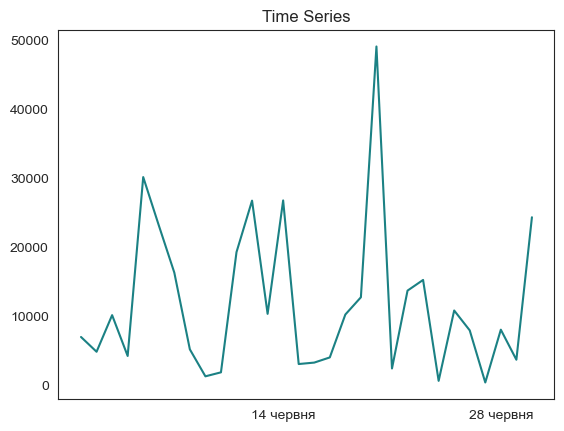

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
sns.set_style('white')
df_pl1 = pd.DataFrame(df1[(df1['Order Date']>= '2015-06-01') & (df1['Order Date'] < '2015-07-01')].groupby(['Order Date'])['Sales'].sum())

plt.plot(df_pl1.index,df_pl1['Sales'] , color = '#1B8184' )
plt.title('Time Series')

x_ticks=['2015-06-14','2015-06-28']
x_labels=['14 червня','28 червня']
plt.xticks (ticks=x_ticks, labels=x_labels) 

plt.show() 

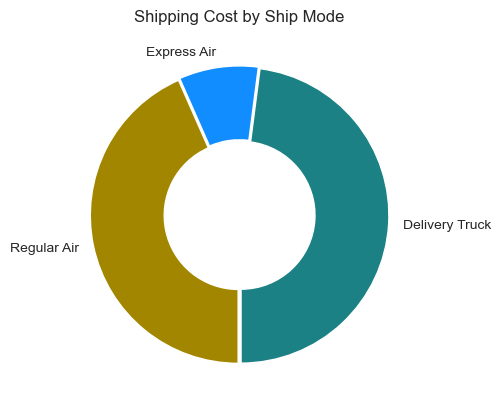

In [11]:
df_pl2 = pd.DataFrame(df1.groupby(['Ship Mode'])['Shipping Cost'].sum())

mycolors = ['#1B8184','#118DFF', '#A38600']
myexplode = [0.01, 0.01, 0.01]

plt.pie(df_pl2['Shipping Cost'], labels =df_pl2.index,wedgeprops=dict(width=0.5), startangle = 270, colors = mycolors,explode = myexplode )
plt.title('Shipping Cost by Ship Mode')
plt.show() 

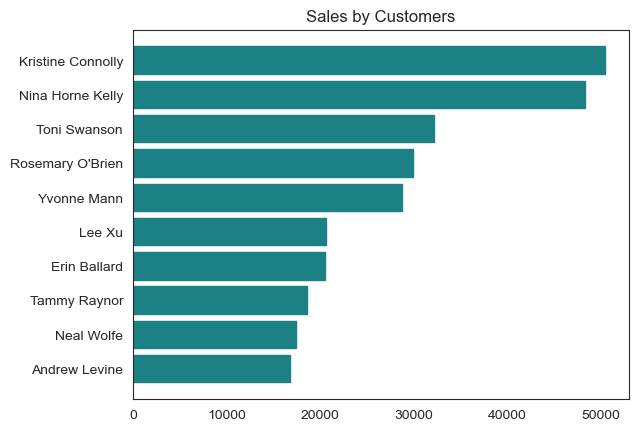

In [14]:
df11 = pd.merge(df1[['Customer ID','Sales']], df2,how='left',on=['Customer ID'])
df_pl = pd.DataFrame(df11.groupby(['Customer Name'])['Sales'].sum().sort_values(ascending=False).head(10)) 
df_pl3 = df_pl.sort_values(ascending=True, by=['Sales'])

plt.barh(df_pl3.index,df_pl3['Sales'], color = '#1B8184', edgecolor='#1B8184')
plt.title('Sales by Customers')
plt.show()

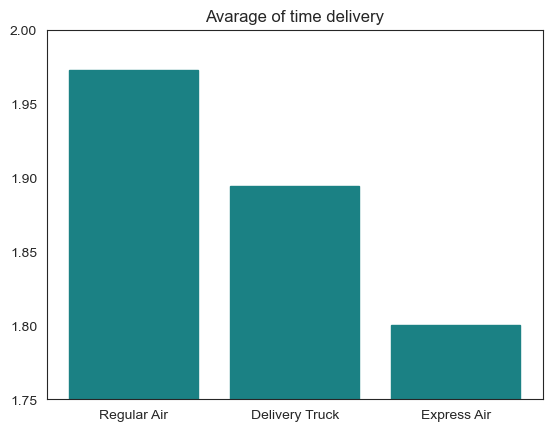

In [19]:

df_pl4 = pd.DataFrame(df1.groupby(['Ship Mode'])['TimeDelivery'].mean()).sort_values(ascending=False, by=['TimeDelivery'])
plt.bar(df_pl4.index,df_pl4['TimeDelivery'], color = '#1B8184', edgecolor='#1B8184')
plt.ylim(1.75, 2)

plt.title('Avarage of time delivery')

plt.show()